Research and Modeling of the Evolution of AGN in the Local Universe

- Grady Cooke, Aubrey Spicola, Sam DiRenzo


# **Abstract** #

AGN, or Active Galactic Nuclei, form when black holes gain enough mass such that an accretion disk of cold gas forms around it; this gas is sucked into the black hole with such great energy that light is emitted. These AGN are characterized by extremely great masses, luminosities, and energies, therefore, probing these intense celestial objects provides an insight into the most extraordinary conditions in the Universe. Our research was conducted in order to better understand the evolution of AGN in the local Universe. The Sloan Digital Sky Survey, or SDSS, was used to gather data pertaining to local AGN, and Python was used to parse this data, via Jupyter Notebooks. Parameters of the AGN which were taken into consideration include luminosity, absolute magnitude, redshift (and therefore distance from the Earth), host galaxy mass, and metallicity. In conducting research, several predictions were made. These predictions were compared to the data obtained via the SDSS as well as relative astrophysical research.


# **Introduction** #

AGN (Active Galactic Nuclei) occur when a supermassive blackhole accrues an amount of mass great enough such that it releases large amounts of energy across the entire electromagnetic spectrum [A&A, 2023].  AGN have a complex energy distribution composed of both non-thermal and thermal continuum emission lines that provide a deeper understanding of the strong gravitational environment of the accretion disk [ScienceDirect, 2023]. Additionally, AGN are composed of two regions: the broad line region (BLR) and the narrow line region (NLR). The BLR contains a greater electron density (108 cm-3) than that of the NLR (103 - 106 cm-3) as well as a greater gas velocity (3,000 - 10,000 km s-1 compared to 300 - 1,000 km s-1) [Caltech, 1990]. The NLR is much larger than the BLR; the BLR is about 10 - 100 light-days (0.00839429 parsecs to 0.0839429 parsecs) whereas the NLR typically measures 100 - 300 parsecs [Caltech, 1990]. Analysis of such a large gas cloud requires consideration of the following parameters: frequency dependence of incident continuum, gas density (pressure) and column density, gas chemical composition, geometrical shape, and ionization parameter.  

AGN with higher luminosities are classified as quasars while AGN with lower luminosities are classified as Seyfert Galaxies and can be further classified as Type 1 or Type 2 [ScienceDirect, 2023]. Type 1 Seyfert galaxies have a visible nucleus and spectra that have both broad and narrow bands whereas Type 2 Seyfert galaxies only display narrow line regions due to an obscured broad line region [Sanders, 2016]. Type 2 AGN are more likely to be found in higher mass galaxies ((10.49(+0.16, -0.10) M than Type 1 AGN (10.23(+0.05, -0.08)M) [A&A, 2023].

Various relationships between mass and other parameters aid in the evaluation of AGN evaluation in our local Universe. These parameters, including luminosity, metallicity, redshift, and host galaxy mass, can be accessed with The Sloan Digital Sky Survey (SDSS). Implementing the use of a sequel query allows for SDSS data extraction and application, which can be analyzed further. Graphs comparing the parameters of local AGN (redshift <= 0.4) were made in order to compare our predictions to prior data found within literature. Therefore, the goal of this project is to assess the evolution of AGN in the local Universe.

# **Analysis** #

Looking at colors of galaxies, we would expect the galaxies which contain AGN and are relatively close to us to appear bluer, as Seyfert galaxies which are further away will be redshifted. We expect AGN host galaxies to be more massive on average compared to non-host galaxies. In a similar manner, we expect AGN host galaxies to be bluer and more luminous than non-AGN host galaxies. This is because the energy required to produce an active galactic nucleus is very great; Einstein’s $E = mc^{2}$ would tell us that highly energetic galaxies also have great mass.
We predict higher redshift AGN have lower metallicity. This is because galaxies viewed at a high redshift are being viewed in the distant past, and in the earlier Universe, heavier elements were not as prevalent. Not all galaxy bins have the same number of points in the sample so the points of comparison of frequency on the plot will never line up which is why it appears skewed. It may not actually be skewed; it may simply be because there are more galaxies in the earlier samples so they show a  different scale. We note that bigger galaxies are easier to detect since they give off more light. When mass increases, metallicity increases, we may preferentially be sampling larger and inherently more metal-rich galaxies. We also expect AGN at higher redshift to be determined to have greater absolute magnitude on average than those at lower redshift due to this mass bias.
Our results support the research in finding that AGN metallicity increases with host galaxy mass. Redshift is correlated with mass, and so our data then imply a positive correlation between AGN metallicity and redshift as well.


#**Visualization**#

# Import Python Libraries #

In [10]:
# Import Python libraries

import numpy as np                  # standard Python library for math operations
import pandas as pd                 # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization
from matplotlib.image import imread

# Use astropy to help with celestial coordinates and reading files
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy import units as u # useful for unit conversions
from astropy.io import fits
from astropy.io import ascii

# Astroquery for the SQL search
from astroquery.sdss import SDSS
from astroquery.simbad import Simbad

# Python standard-libraries to download data from the web
from urllib.parse import urlencode
from urllib.request import urlretrieve

# only here to display images
from IPython.display import Image

# import matplotlib and some of its modules

import matplotlib
%config InlineBackend.rc = {}
from matplotlib import pylab as plt
%matplotlib inline

In [11]:
# Ensures columns get written completely in notebook
pd.set_option('display.max_colwidth', None)

# AGN0, z = 0.0-0.01 #

In [13]:
query0 = """
SELECT
    s.plate, s.fiberid, s.mjd, s.z AS redshift, s.zwarning,
    g.oiii_5007_flux, g.h_beta_flux, g.nii_6584_flux, g.h_alpha_flux,
    g.oiii_5007_flux_err, g.h_beta_flux_err, g.nii_6584_flux_err, g.h_alpha_flux_err,
    e.bptclass, e.lgm_tot_p50 AS log_mass, e.oh_p50 AS oxygen_abundance,
    p.petroR90_r, p.ra, p.dec,
    p.petroFlux_g, p.petroFlux_i, p.petroFlux_r, p.petroFlux_u, p.petroFlux_z,
    p.petroR90Err_g, p.petroR90Err_i, p.petroR90Err_r, p.petroR90Err_u, p.petroR90Err_z,
    p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z,
    p.petroMagErr_u, p.petroMagErr_g, p.petroMagErr_r, p.petroMagErr_i, p.petroMagErr_z
FROM GalSpecLine AS g
JOIN SpecObj AS s ON s.specobjid = g.specobjid
JOIN GalSpecExtra AS e ON s.specobjid = e.specobjid
JOIN PhotoObjAll AS p ON s.specObjID = p.specObjID
WHERE s.z BETWEEN 0 AND 0.01
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux_err > 0
AND g.h_beta_flux_err > 0
AND s.class = 'GALAXY'
AND s.zwarning = 0
AND (g.oiii_5007_flux / g.h_beta_flux) > 3
AND (g.nii_6584_flux / g.h_alpha_flux) < 0.6


"""
agn0 = SDSS.query_sql(query0, data_release=16)

agn0

<Table length=517>
plate fiberid  mjd    redshift  ... petroMagErr_r petroMagErr_i petroMagErr_z
int64  int64  int64   float64   ...    float64       float64       float64   
----- ------- ----- ----------- ... ------------- ------------- -------------
 1945     447 53387 0.004986184 ...   0.007923232     0.0122577    0.03822719
 1350     147 52786 0.009074133 ...     0.0262688    0.03686401     0.1142722
 2236     518 53729 0.003727985 ...    0.01287882    0.02177712      0.163873
 1309     440 52762 0.006871286 ...    0.01574855    0.02075483    0.08443534
  533      10 51994   0.0081429 ...     0.0387335    0.04672069    0.08178071
 2491     396 53855 0.009813778 ...    0.09085835     0.1746198     0.8372244
 1166      91 52751 0.008321558 ...    0.02211384    0.03832928     0.1384603
 1173       4 52790 0.002910392 ...      1.478235      2.411847      6.663134
  411     159 51817 0.005611976 ...   0.007314922   0.009633168    0.03236087
  ...     ...   ...         ... ...           ...           ...           ...
 1618     413 53116 0.003443445 ...    0.07963168    0.09694676     0.1219013
 2008     471 53473 0.006017962 ...   0.005359008   0.007308762     0.0222984
  964     258 52646 0.006444433 ...    0.02190282    0.04277984     0.1166969
 1745     357 53061 0.009088153 ...    0.01107976    0.01481656    0.05763661
  843     541 52378 0.006725679 ...   0.008650312   0.009986834    0.01097172
 2549     567 54523 0.006097702 ...    0.04919389      3.618406     0.2937816
 1990     338 53472 0.005495231 ...   0.005111304    0.00684503    0.02798766
 1018     518 52672 0.005830204 ...   0.009432327    0.01477767    0.03914951
 2952     411 54559 0.004881246 ...    0.01409261    0.04710159     0.1214289
  884     481 52374 0.001000904 ...   0.008044103    0.01649832    0.05951344

# AGN1, z = 0.01 - 0.03419952 #

In [15]:
query1 = """
SELECT
    s.plate, s.fiberid, s.mjd, s.z AS redshift, s.zwarning,
    g.oiii_5007_flux, g.h_beta_flux, g.nii_6584_flux, g.h_alpha_flux,
    g.oiii_5007_flux_err, g.h_beta_flux_err, g.nii_6584_flux_err, g.h_alpha_flux_err,
    e.bptclass, e.lgm_tot_p50 AS log_mass, e.oh_p50 AS oxygen_abundance,
    p.petroR90_r, p.ra, p.dec,
    p.petroFlux_g, p.petroFlux_i, p.petroFlux_r, p.petroFlux_u, p.petroFlux_z,
    p.petroR90Err_g, p.petroR90Err_i, p.petroR90Err_r, p.petroR90Err_u, p.petroR90Err_z,
    p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z,
    p.petroMagErr_u, p.petroMagErr_g, p.petroMagErr_r, p.petroMagErr_i, p.petroMagErr_z
FROM GalSpecLine AS g
JOIN SpecObj AS s ON s.specobjid = g.specobjid
JOIN GalSpecExtra AS e ON s.specobjid = e.specobjid
JOIN PhotoObjAll AS p ON s.specObjID = p.specObjID
WHERE s.z BETWEEN 0.01 AND 0.03419952
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux_err > 0
AND g.h_beta_flux_err > 0
AND s.class = 'GALAXY'
AND s.zwarning = 0
AND (g.oiii_5007_flux / g.h_beta_flux) > 3
AND (g.nii_6584_flux / g.h_alpha_flux) < 0.6


"""
agn1 = SDSS.query_sql(query1, data_release=16)

agn1

<Table length=1711>
plate fiberid  mjd   redshift  ... petroMagErr_r petroMagErr_i petroMagErr_z
int64  int64  int64  float64   ...    float64       float64       float64   
----- ------- ----- ---------- ... ------------- ------------- -------------
  304      20 51609 0.03182963 ...    0.01777523    0.02600691    0.06075278
  602     324 52072 0.02061065 ...    0.01496968    0.02035154    0.06611606
  354     275 51792 0.02142936 ...     0.0141388     0.0186101    0.04965049
  617     464 52072 0.01140887 ...    0.04810449    0.08148295    0.09513899
  510     635 52381 0.02032679 ...     0.1632414     0.2320885     0.4780133
  463     299 51908 0.03319353 ...     0.0322707    0.03342209    0.07933556
  437      10 51876 0.02490356 ...    0.01570117    0.03322861     0.1237127
 1171      23 52753 0.02856308 ...     0.0135584    0.01323435    0.02758019
 2974     360 54592 0.03020841 ...   0.006254259   0.008465588    0.02702499
  ...     ...   ...        ... ...           ...           ...           ...
 2356     493 53786 0.02630063 ...    0.01231457    0.01806511    0.07158076
 2238     393 54205 0.02565317 ...    0.01235734    0.01592805    0.05354137
  328     617 52282 0.02734146 ...    0.04109274    0.09159995      0.377122
  802     440 52289 0.02332559 ...    0.03088224    0.03938865     0.1587766
 2104     557 53852 0.01816438 ...    0.01137742     0.0178738    0.06928958
 1114     599 53179 0.01377759 ...    0.01984429    0.02946875     0.1491556
 1289     322 52734 0.01558991 ...    0.01266347    0.01671626    0.06236141
  858     324 52316 0.01570628 ...      1.186201      0.711351      1.325678
 1007     328 52706 0.01622112 ...     0.0957664     0.1866525     0.1484814
  336     198 51999 0.01087375 ...    0.01106237    0.01475334    0.05629722

# AGN2, z = 0.03419952 - 0.11696071 #

In [17]:
query2 = """
SELECT
    s.plate, s.fiberid, s.mjd, s.z AS redshift, s.zwarning,
    g.oiii_5007_flux, g.h_beta_flux, g.nii_6584_flux, g.h_alpha_flux,
    g.oiii_5007_flux_err, g.h_beta_flux_err, g.nii_6584_flux_err, g.h_alpha_flux_err,
    e.bptclass, e.lgm_tot_p50 AS log_mass, e.oh_p50 AS oxygen_abundance,
    p.petroR90_r, p.ra, p.dec,
    p.petroFlux_g, p.petroFlux_i, p.petroFlux_r, p.petroFlux_u, p.petroFlux_z,
    p.petroR90Err_g, p.petroR90Err_i, p.petroR90Err_r, p.petroR90Err_u, p.petroR90Err_z,
    p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z,
    p.petroMagErr_u, p.petroMagErr_g, p.petroMagErr_r, p.petroMagErr_i, p.petroMagErr_z
FROM GalSpecLine AS g
JOIN SpecObj AS s ON s.specobjid = g.specobjid
JOIN GalSpecExtra AS e ON s.specobjid = e.specobjid
JOIN PhotoObjAll AS p ON s.specObjID = p.specObjID
WHERE s.z BETWEEN 0.03419952 AND 0.11696071
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux_err > 0
AND g.h_beta_flux_err > 0
AND s.class = 'GALAXY'
AND s.zwarning = 0
AND (g.oiii_5007_flux / g.h_beta_flux) > 3
AND (g.nii_6584_flux / g.h_alpha_flux) < 0.6




"""
agn2 = SDSS.query_sql(query2, data_release=16)

agn2

<Table length=2433>
plate fiberid  mjd   redshift  ... petroMagErr_r petroMagErr_i petroMagErr_z
int64  int64  int64  float64   ...    float64       float64       float64   
----- ------- ----- ---------- ... ------------- ------------- -------------
  762     412 52232 0.09007303 ...    0.02552807    0.02032293    0.04615966
  764     597 52238 0.03777998 ...    0.01879062     0.0205892    0.07180715
  766     315 52247 0.03489631 ...    0.02424427    0.02836093    0.07155836
  771     490 52370 0.03476755 ...     0.0176712    0.02074384    0.05569056
  805     532 52586 0.05434101 ...    0.03861888    0.04545406     0.1989141
  747      58 52234 0.06303232 ...    0.03449412    0.05619426     0.1665973
 2002     468 53471 0.04977068 ...    0.00664034   0.007231809    0.01981041
 1225     288 52760  0.1044043 ...    0.01730408    0.01636315    0.04169827
  439     480 51877 0.03978983 ...    0.04133769    0.06717425    0.09979053
  ...     ...   ...        ... ...           ...           ...           ...
  945     423 52652  0.0474776 ...    0.05722609    0.04082662     0.1330124
  957     530 52398   0.044252 ...    0.01588104    0.02180885    0.08110975
 1088     146 52929 0.07926375 ...    0.03421006    0.03681235     0.1138969
 1091     587 52902 0.03661454 ...    0.05398992     0.1087802      6.945725
 1095     619 52521 0.06084215 ...    0.05995793    0.06990085     0.5236015
 1187     121 52708 0.08494292 ...    0.02379635    0.01700818    0.03852983
 1284     256 52736 0.07289203 ...   0.009976172     0.0109507    0.04293282
  853     540 52374 0.03539081 ...    0.01766824    0.02355586    0.06673481
 2742     329 54233 0.07871718 ...    0.02049038    0.02651891    0.08611324
 2747     145 54233 0.04010446 ...    0.03543025    0.04094759    0.03462896

# AGN3, z = 0.11696071 - 0.4 #

In [19]:
query3 = """
SELECT
    s.plate, s.fiberid, s.mjd, s.z AS redshift, s.zwarning,
    g.oiii_5007_flux, g.h_beta_flux, g.nii_6584_flux, g.h_alpha_flux,
    g.oiii_5007_flux_err, g.h_beta_flux_err, g.nii_6584_flux_err, g.h_alpha_flux_err,
    e.bptclass, e.lgm_tot_p50 AS log_mass, e.oh_p50 AS oxygen_abundance,
    p.petroR90_r, p.ra, p.dec,
    p.petroFlux_g, p.petroFlux_i, p.petroFlux_r, p.petroFlux_u, p.petroFlux_z,
    p.petroR90Err_g, p.petroR90Err_i, p.petroR90Err_r, p.petroR90Err_u, p.petroR90Err_z,
    p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z,
    p.petroMagErr_u, p.petroMagErr_g, p.petroMagErr_r, p.petroMagErr_i, p.petroMagErr_z
FROM GalSpecLine AS g
JOIN SpecObj AS s ON s.specobjid = g.specobjid
JOIN GalSpecExtra AS e ON s.specobjid = e.specobjid
JOIN PhotoObjAll AS p ON s.specObjID = p.specObjID
WHERE s.z BETWEEN 0.11696071 AND 0.4
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux_err > 0
AND g.h_beta_flux_err > 0
AND s.class = 'GALAXY'
AND s.zwarning = 0
AND (g.oiii_5007_flux / g.h_beta_flux) > 3
AND (g.nii_6584_flux / g.h_alpha_flux) < 0.6

"""
agn3 = SDSS.query_sql(query3, data_release=16)

agn3

<Table length=1270>
plate fiberid  mjd   redshift ... petroMagErr_r petroMagErr_i petroMagErr_z
int64  int64  int64  float64  ...    float64       float64       float64   
----- ------- ----- --------- ... ------------- ------------- -------------
  669     525 52559 0.3317809 ...    0.03777916    0.03864982     0.1039589
  671     404 52206 0.3084081 ...    0.04666802     0.0925891     0.2128982
  693     188 52254 0.2252657 ...     0.1484794     0.5886413     0.2812588
  627     253 52144 0.1649524 ...    0.01905664    0.02687834     0.1512942
 2224     510 53815 0.1455534 ...    0.01658412    0.02019342    0.04680716
 1981      16 53463 0.2385986 ...    0.02428135    0.02898183    0.08624852
 2004     453 53737 0.1801596 ...    0.04794015     0.1150728     0.3740424
  554     640 52000 0.1905745 ...    0.02456279    0.02572702    0.06917115
  416      41 51811  0.270662 ...    0.04177296     0.2308455     0.6032448
  ...     ...   ...       ... ...           ...           ...           ...
 1402     143 52872 0.1873069 ...    0.04027946     0.0795246     0.6128277
 1350      14 52786 0.1350928 ...    0.01600069    0.01373437    0.03322581
  778      60 54525 0.2621008 ...    0.05625247     0.2270457     0.3509882
 1203     520 52669 0.2669635 ...    0.02498969    0.02522958    0.05783893
 2435     257 53828 0.1417365 ...    0.01490552    0.01638292    0.05075116
 1575      23 53493 0.1283777 ...    0.03781047    0.03903692    0.04660649
 2950     259 54559 0.1275947 ...    0.03690341     0.0439745     0.2844045
 2961     330 54550 0.3945765 ...    0.07645979    0.09259023     0.3097527
 1957     535 53415 0.1265002 ...   0.008439843    0.01142776    0.06316469
 2612     519 54480 0.2872156 ...    0.04842236       0.10187     0.3913406

# Metallicity Frequencies for Each Group (Figure 1) #

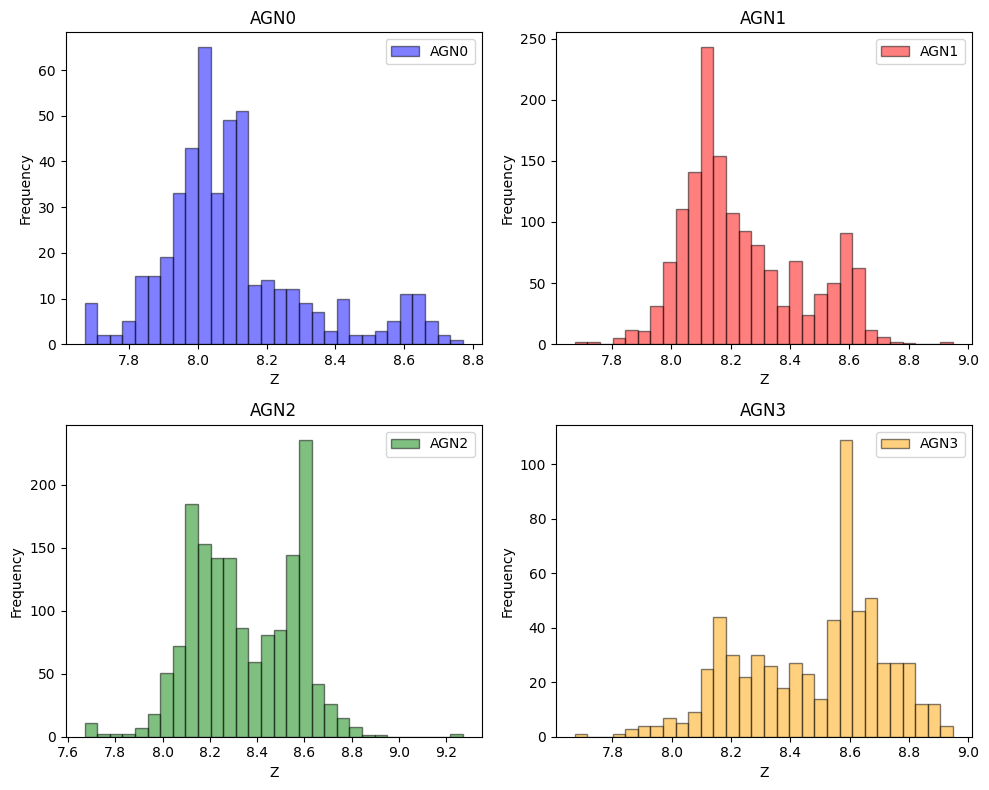

In [21]:
agn0_positive_oxygen = agn0[agn0['oxygen_abundance'] > 0]
agn1_positive_oxygen = agn1[agn1['oxygen_abundance'] > 0]
agn2_positive_oxygen = agn2[agn2['oxygen_abundance'] > 0]
agn3_positive_oxygen = agn3[agn3['oxygen_abundance'] > 0]


bins = 30
alpha = 0.5
edgecolor = 'black'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(agn0_positive_oxygen['oxygen_abundance'], bins=bins, alpha=alpha, edgecolor=edgecolor, color = 'blue', label='AGN0')
axs[0, 0].set_title('AGN0')
axs[0, 0].set_xlabel('Z')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

axs[0, 1].hist(agn1_positive_oxygen['oxygen_abundance'], bins=bins, alpha=alpha, edgecolor=edgecolor, color = 'red', label='AGN1')
axs[0, 1].set_title('AGN1')
axs[0, 1].set_xlabel('Z')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

axs[1, 0].hist(agn2_positive_oxygen['oxygen_abundance'], bins=bins, alpha=alpha, edgecolor=edgecolor, color = 'green', label='AGN2')
axs[1, 0].set_title('AGN2')
axs[1, 0].set_xlabel('Z')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

axs[1, 1].hist(agn3_positive_oxygen['oxygen_abundance'], bins=bins, alpha=alpha, edgecolor=edgecolor, color = 'orange', label='AGN3')
axs[1, 1].set_title('AGN3')
axs[1, 1].set_xlabel('Z')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

plt.tight_layout()

plt.show()

# Metallicity v. Redshift (Figure 2) #

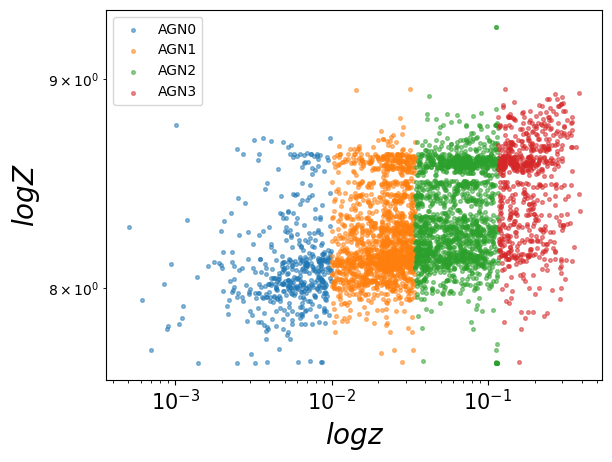

In [23]:
agn0_filtered = agn0[(agn0['oxygen_abundance'] > 0) & (agn0['redshift'] > 0)]
agn1_filtered = agn1[(agn1['oxygen_abundance'] > 0) & (agn1['redshift'] > 0)]
agn2_filtered = agn2[(agn2['oxygen_abundance'] > 0) & (agn2['redshift'] > 0)]
agn3_filtered = agn3[(agn3['oxygen_abundance'] > 0) & (agn3['redshift'] > 0)]

plt.scatter(agn0_filtered['redshift'], agn0_filtered['oxygen_abundance'], alpha=0.5, s=7, label='AGN0')
plt.scatter(agn1_filtered['redshift'], agn1_filtered['oxygen_abundance'], alpha=0.5, s=7, label='AGN1')
plt.scatter(agn2_filtered['redshift'], agn2_filtered['oxygen_abundance'], alpha=0.5, s=7, label='AGN2')
plt.scatter(agn3_filtered['redshift'], agn3_filtered['oxygen_abundance'], alpha=0.5, s=7, label='AGN3')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$logz$', fontsize=20)
plt.ylabel('$logZ$', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

plt.show()


# Mass v. Redshift (Figure 3) #

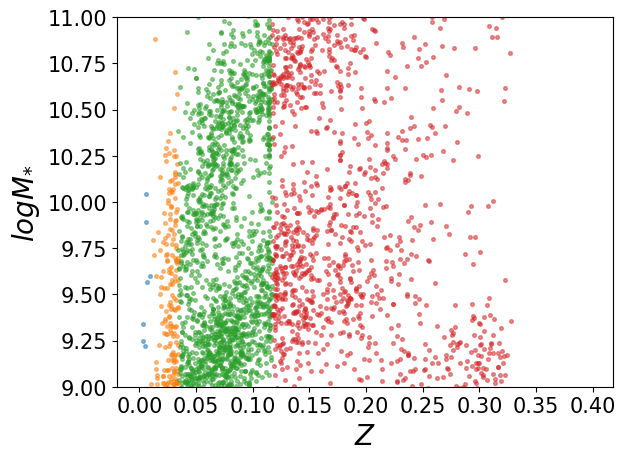

<Figure size 600x1000 with 0 Axes>

In [25]:
plt.scatter(agn0['redshift'], agn0['log_mass'], alpha=0.5, s=7, label='AGN0')
plt.scatter(agn1['redshift'], agn1['log_mass'], alpha=0.5, s=7, label='AGN1')
plt.scatter(agn2['redshift'], agn2['log_mass'], alpha=0.5, s=7, label='AGN2')
plt.scatter(agn3['redshift'], agn3['log_mass'], alpha=0.5, s=7, label='AGN3')

plt.xlabel('$Z$', fontsize=20)
plt.ylabel('$logM_{*}$', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(bottom=9)
plt.ylim(top=11)
plt.figure(figsize=(6,10))

plt.show()


# Mass v. Metallicity (Figure 4) #

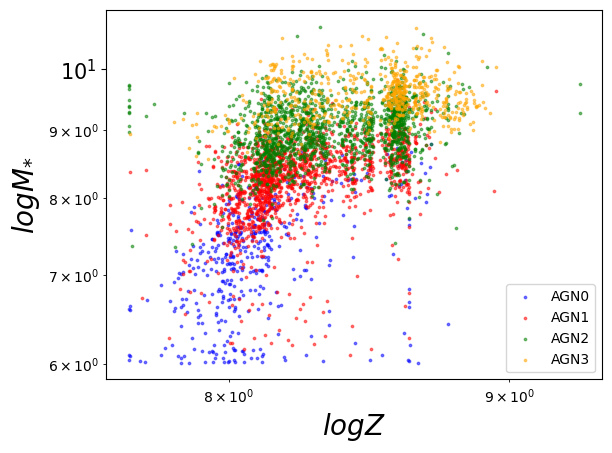

In [27]:
agn0_filtered = agn0[(agn0['oxygen_abundance'] > 0) & (agn0['log_mass'] > 0)]
agn1_filtered = agn1[(agn1['oxygen_abundance'] > 0) & (agn1['log_mass'] > 0)]
agn2_filtered = agn2[(agn2['oxygen_abundance'] > 0) & (agn2['log_mass'] > 0)]
agn3_filtered = agn3[(agn3['oxygen_abundance'] > 0) & (agn3['log_mass'] > 0)]


plt.scatter(agn0_filtered['oxygen_abundance'], agn0_filtered['log_mass'],alpha=0.5, s=3, color = 'blue', label='AGN0')
plt.scatter(agn1_filtered['oxygen_abundance'], agn1_filtered['log_mass'],alpha=0.5, s=3, color = 'red', label='AGN1')
plt.scatter(agn2_filtered['oxygen_abundance'], agn2_filtered['log_mass'],alpha=0.5, s=3, color = 'green', label='AGN2')
plt.scatter(agn3_filtered['oxygen_abundance'], agn3_filtered['log_mass'],alpha=0.5, s=3, color = 'orange', label='AGN3')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$logZ$', fontsize = '20')
plt.ylabel('$logM_{*}$', fontsize = '20')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend()

plt.show()


# Generating Image Cutouts (Figure 5) #


Getting image of a nice looking galaxy 1 of 30...
Getting image of a nice looking galaxy 2 of 30...
Getting image of a nice looking galaxy 3 of 30...
Getting image of a nice looking galaxy 4 of 30...
Getting image of a nice looking galaxy 5 of 30...
Getting image of a nice looking galaxy 6 of 30...
Getting image of a nice looking galaxy 7 of 30...
Getting image of a nice looking galaxy 8 of 30...
Getting image of a nice looking galaxy 9 of 30...
Getting image of a nice looking galaxy 10 of 30...
Getting image of a nice looking galaxy 11 of 30...
Getting image of a nice looking galaxy 12 of 30...
Getting image of a nice looking galaxy 13 of 30...
Getting image of a nice looking galaxy 14 of 30...
Getting image of a nice looking galaxy 15 of 30...
Getting image of a nice looking galaxy 16 of 30...
Getting image of a nice looking galaxy 17 of 30...
Getting image of a nice looking galaxy 18 of 30...
Getting image of a nice looking galaxy 19 of 30...
Getting image of a nice looking galaxy 2

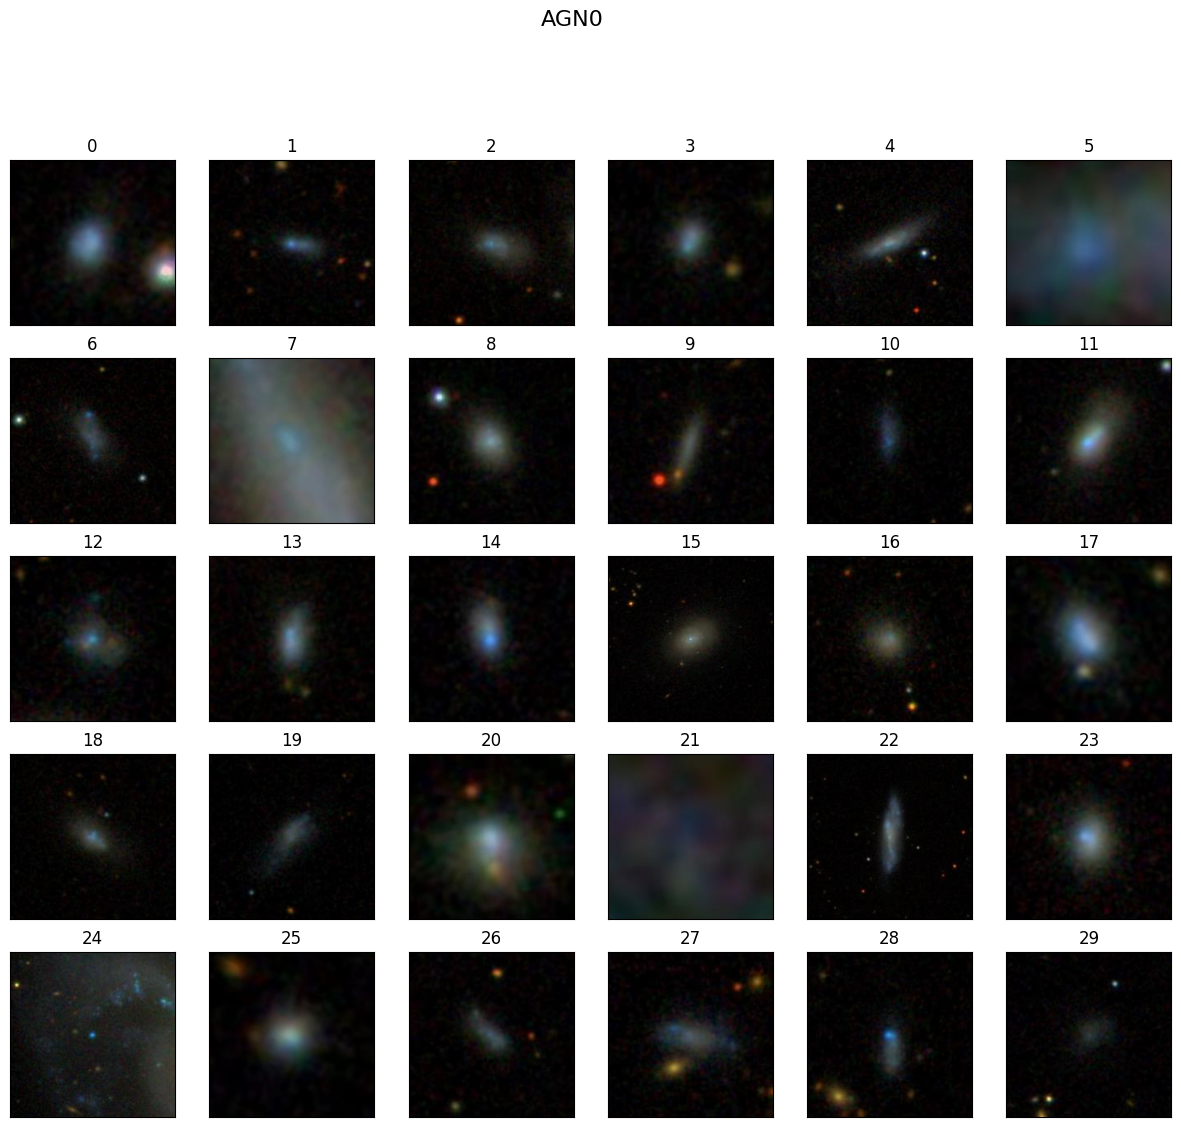

Getting image of a nice looking galaxy 1 of 30...
Getting image of a nice looking galaxy 2 of 30...
Getting image of a nice looking galaxy 3 of 30...
Getting image of a nice looking galaxy 4 of 30...
Getting image of a nice looking galaxy 5 of 30...
Getting image of a nice looking galaxy 6 of 30...
Getting image of a nice looking galaxy 7 of 30...
Getting image of a nice looking galaxy 8 of 30...
Getting image of a nice looking galaxy 9 of 30...
Getting image of a nice looking galaxy 10 of 30...
Getting image of a nice looking galaxy 11 of 30...
Getting image of a nice looking galaxy 12 of 30...
Getting image of a nice looking galaxy 13 of 30...
Getting image of a nice looking galaxy 14 of 30...
Getting image of a nice looking galaxy 15 of 30...
Getting image of a nice looking galaxy 16 of 30...
Getting image of a nice looking galaxy 17 of 30...
Getting image of a nice looking galaxy 18 of 30...
Getting image of a nice looking galaxy 19 of 30...
Getting image of a nice looking galaxy 2

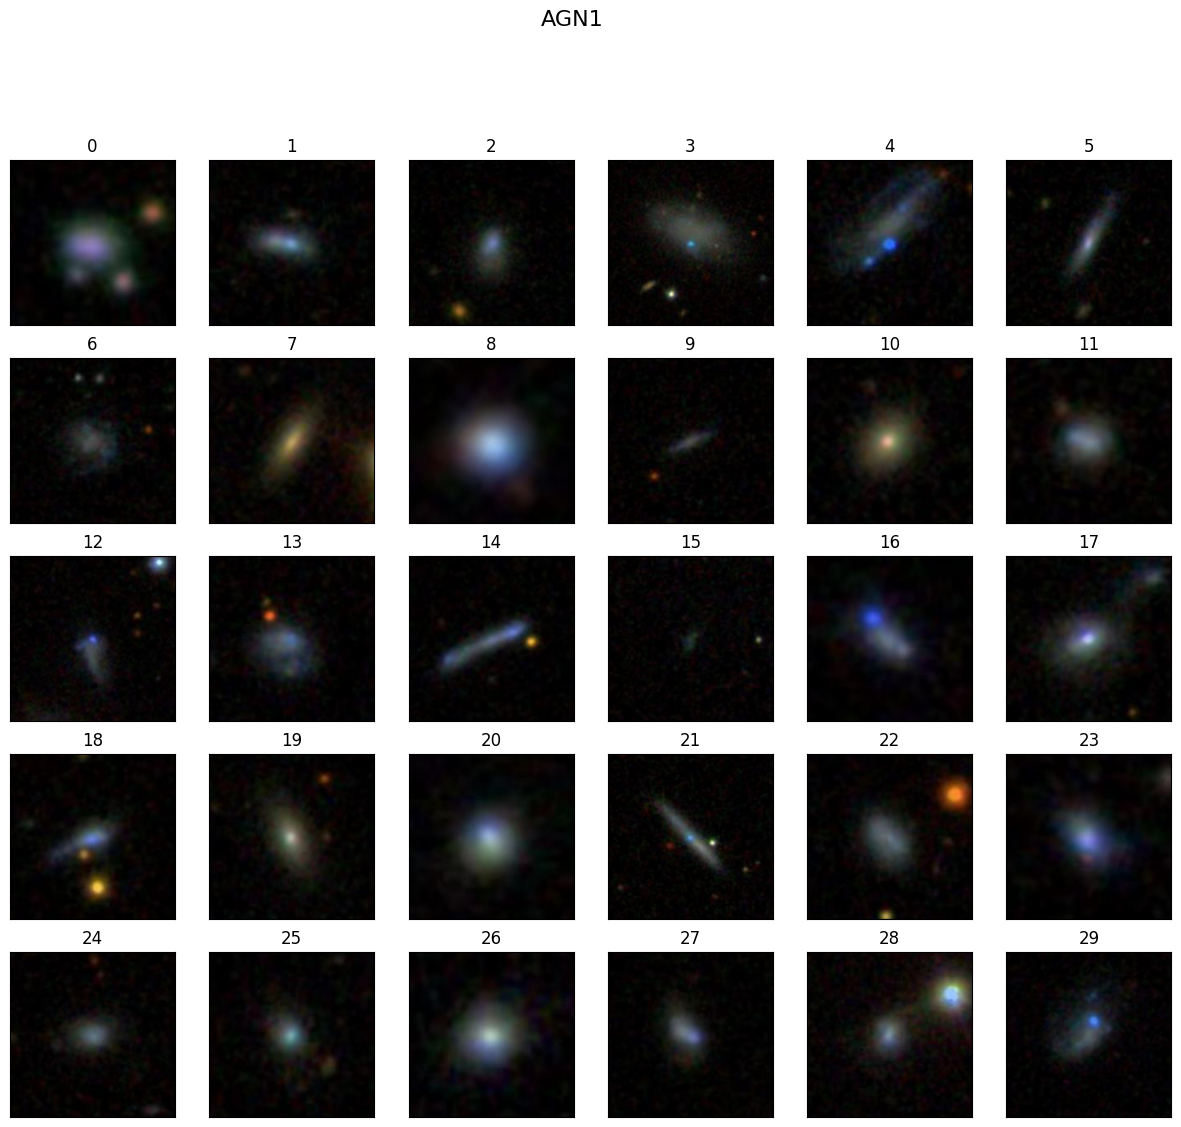

Getting image of a nice looking galaxy 1 of 30...
Getting image of a nice looking galaxy 2 of 30...
Getting image of a nice looking galaxy 3 of 30...
Getting image of a nice looking galaxy 4 of 30...
Getting image of a nice looking galaxy 5 of 30...
Getting image of a nice looking galaxy 6 of 30...
Getting image of a nice looking galaxy 7 of 30...
Getting image of a nice looking galaxy 8 of 30...
Getting image of a nice looking galaxy 9 of 30...
Getting image of a nice looking galaxy 10 of 30...
Getting image of a nice looking galaxy 11 of 30...
Getting image of a nice looking galaxy 12 of 30...
Getting image of a nice looking galaxy 13 of 30...
Getting image of a nice looking galaxy 14 of 30...
Getting image of a nice looking galaxy 15 of 30...
Getting image of a nice looking galaxy 16 of 30...
Getting image of a nice looking galaxy 17 of 30...
Getting image of a nice looking galaxy 18 of 30...
Getting image of a nice looking galaxy 19 of 30...
Getting image of a nice looking galaxy 2

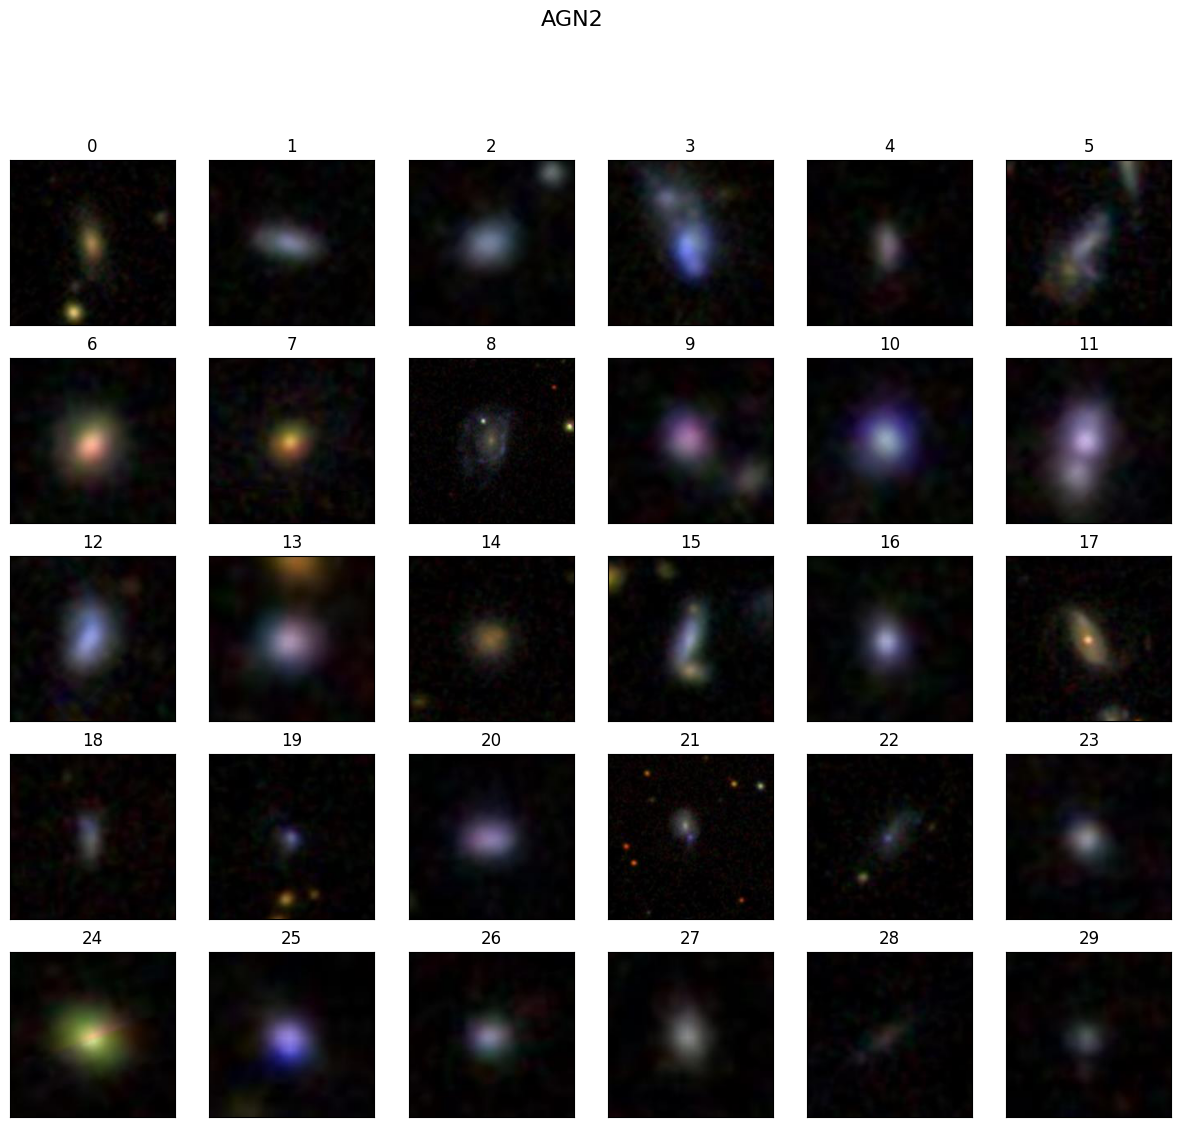

Getting image of a nice looking galaxy 1 of 30...
Getting image of a nice looking galaxy 2 of 30...
Getting image of a nice looking galaxy 3 of 30...
Getting image of a nice looking galaxy 4 of 30...
Getting image of a nice looking galaxy 5 of 30...
Getting image of a nice looking galaxy 6 of 30...
Getting image of a nice looking galaxy 7 of 30...
Getting image of a nice looking galaxy 8 of 30...
Getting image of a nice looking galaxy 9 of 30...
Getting image of a nice looking galaxy 10 of 30...
Getting image of a nice looking galaxy 11 of 30...
Getting image of a nice looking galaxy 12 of 30...
Getting image of a nice looking galaxy 13 of 30...
Getting image of a nice looking galaxy 14 of 30...
Getting image of a nice looking galaxy 15 of 30...
Getting image of a nice looking galaxy 16 of 30...
Getting image of a nice looking galaxy 17 of 30...
Getting image of a nice looking galaxy 18 of 30...
Getting image of a nice looking galaxy 19 of 30...
Getting image of a nice looking galaxy 2

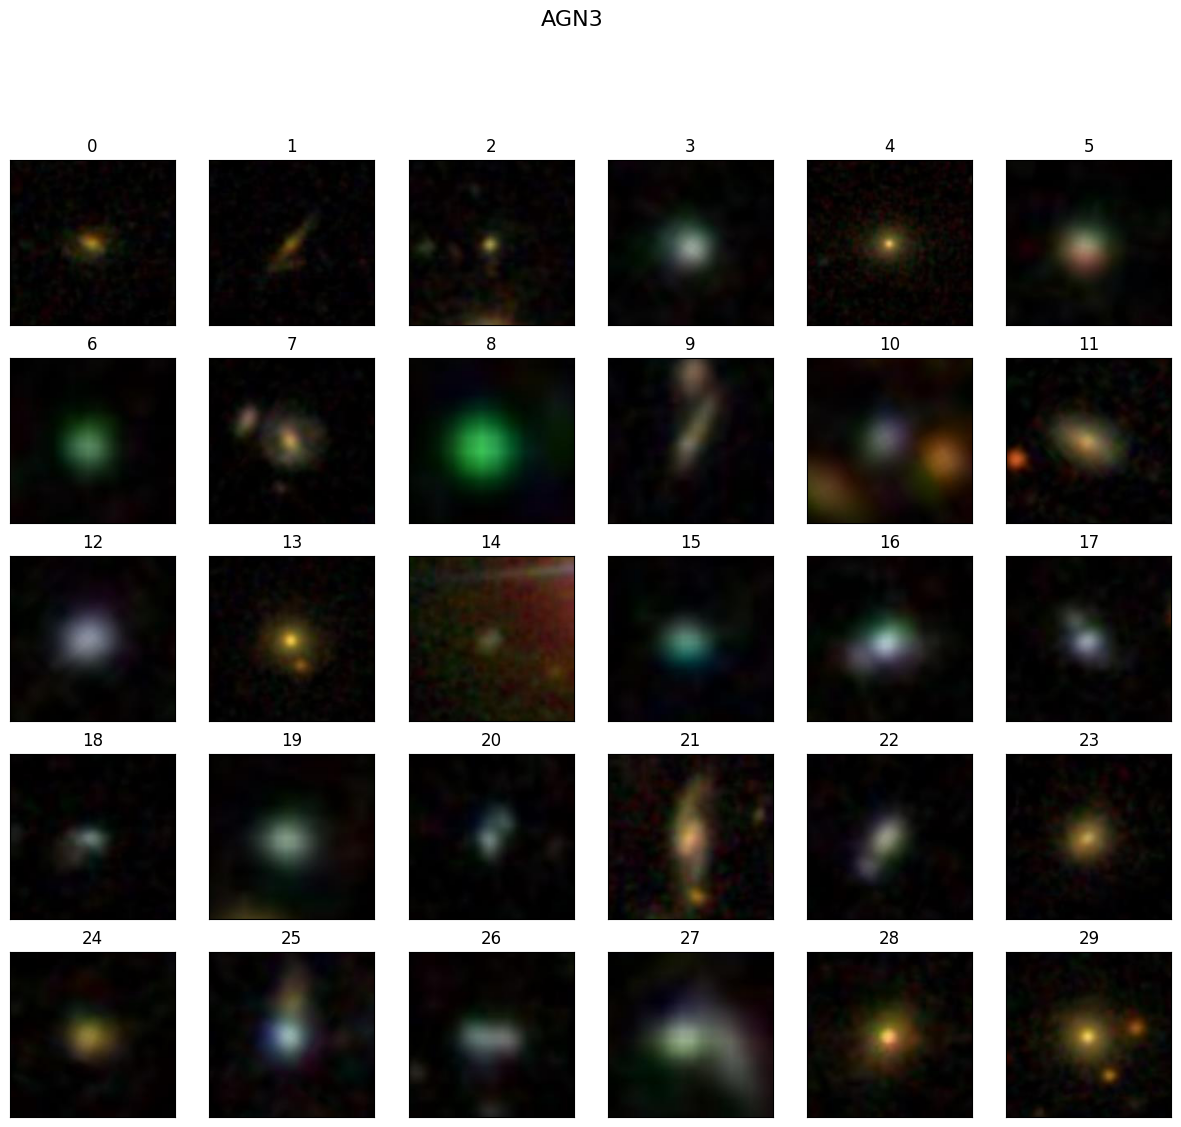

In [29]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import pandas as pd
from urllib.parse import urlencode
from urllib.request import urlretrieve
from matplotlib.image import imread
import astropy.units as u

def get_images(gal_array, description, figure_title):
    # Clear the current figure if it exists and set a new figure title
    plt.figure(figsize=(15, 15))
    plt.suptitle(figure_title, fontsize=16)  # Add a title to the figure

    # set thumbnail parameters
    width = 200           # image width
    height = 200          # height
    pixelsize = 0.396     # image scale
    subPlotNum = 1

    i = 0
    new_gals = gal_array.to_pandas()  # change to dataframe
    new_gals.reset_index()            # set index to zero
    nGalaxies = 30
    for index in range(0, nGalaxies):  # iterate through rows in the DataFrame
        i += 1
        if i < 31:
            print('Getting image of ' + description + str(i) + ' of ' + str(nGalaxies) + '...')
            if i == nGalaxies:
                print('Plotting images...')
            scale = 2.0 * new_gals['petroR90_r'][index] / pixelsize / width

            pos = coords.SkyCoord(new_gals['ra'][index], new_gals['dec'][index], unit=u.deg, frame='icrs')

            cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
            query_string = urlencode(dict(ra=new_gals['ra'][index], dec=new_gals['dec'][index], width=width, height=height, scale=scale))
            url = cutoutbaseurl + '?' + query_string

            # this downloads the image
            image_name = 'cutout_' + str(index) + '.jpg'
            urlretrieve(url, image_name)

            # Display the image
            img = imread(image_name)

            plt.subplot(6, 6, subPlotNum)
            subPlotNum += 1
            plt.imshow(img)  # show images in grid
            plt.xticks([])
            plt.yticks([])
            plt.title(index)  # show the object identifier (objId) above the image.

    plt.show()  # Display the figure

# Example of calling the function
get_images(agn0, 'a nice looking galaxy ', 'AGN0')
get_images(agn1, 'a nice looking galaxy ', 'AGN1')
get_images(agn2, 'a nice looking galaxy ', 'AGN2')
get_images(agn3, 'a nice looking galaxy ', 'AGN3')


# Absolute Magnitudes for Each AGN Group (Figure 6) #

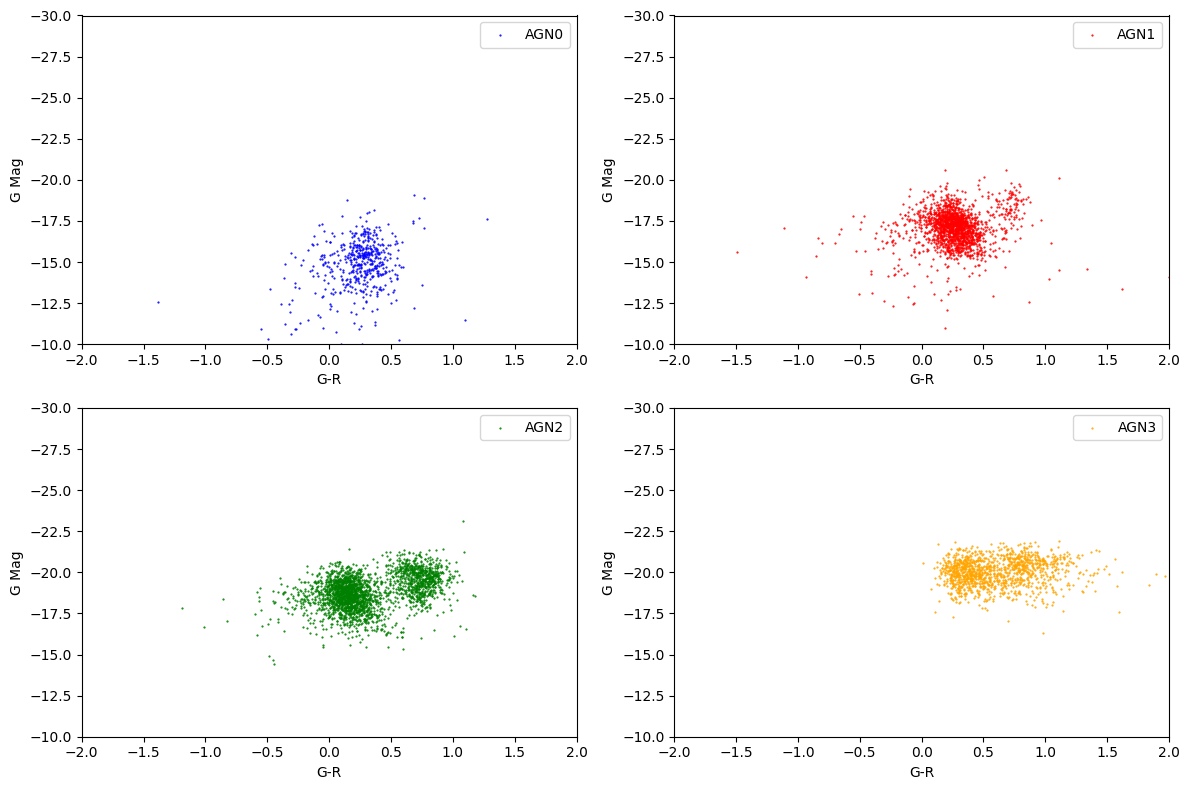

In [31]:
def get_d_from_z(z, c=3e5, H_0=70):
    return (c * z) / H_0 * 1e6

def get_abs_mag(app_mag, d):
    return app_mag - 5 * (np.log10(d) - 1)

def filter_and_extract(agn_data):
    criteria = (agn_data['petroMag_g'] > 5 * agn_data['petroMagErr_g']) & (agn_data['petroFlux_r'] > 5 * agn_data['petroMagErr_g'])
    filtered_data = agn_data[criteria]
    return filtered_data['petroMag_g'], filtered_data['petroMag_r'], filtered_data['redshift']

agn0_g_mag, agn0_r_mag, agn0_z = filter_and_extract(agn0)
agn1_g_mag, agn1_r_mag, agn1_z = filter_and_extract(agn1)
agn2_g_mag, agn2_r_mag, agn2_z = filter_and_extract(agn2)
agn3_g_mag, agn3_r_mag, agn3_z = filter_and_extract(agn3)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
agn_data_list = [(agn0_g_mag, agn0_r_mag, agn0_z), (agn1_g_mag, agn1_r_mag, agn1_z),
                 (agn2_g_mag, agn2_r_mag, agn2_z), (agn3_g_mag, agn3_r_mag, agn3_z)]
colors = ['blue', 'red', 'green', 'orange']
labels = ['AGN0', 'AGN1', 'AGN2', 'AGN3']

for i, (agn_g, agn_r, agn_z) in enumerate(agn_data_list):
    d = get_d_from_z(agn_z)
    abs_mag_g = get_abs_mag(agn_g, d)
    abs_mag_r = get_abs_mag(agn_r, d)
    abs_color_index_gr = abs_mag_g - abs_mag_r

    ax = axs[i // 2, i % 2]
    ax.scatter(abs_color_index_gr, abs_mag_g, color=colors[i], s=0.3, label=labels[i])
    ax.set_xlabel('G-R')
    ax.set_ylabel('G Mag')
    ax.set_xlim(-2,2)
    ax.set_ylim(-30, -10)
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()



# K-S Test for Significance of Color Change #

The K-S test is a nonparametric test that compares the cumulative distribution functions (CDFs) of two datasets to determine if they are from the same continuous distribution. We are looking to determine if the samples of AGN have different color distributions, which we hypothesized from looking at the image cutouts and the color magnitude plots. If the K-S test results in a low p-value, it suggests that the two samples compared are likely to have come from different distributions, affirming our hypothesis that the AGN groups exhibit distinct color properties across various redshift ranges. Such a finding would indicate that the physical conditions within these galaxies—such as star formation rates, age of stellar populations, presence of dust, and metallicity—are evolving.

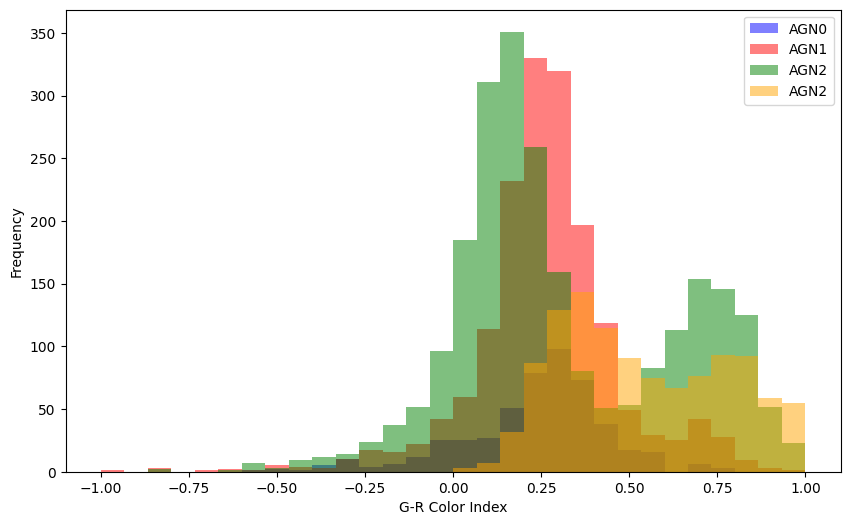

KS Test between AGN0 and AGN1: KstestResult(statistic=0.07953951055482907, pvalue=0.013612235707502978, statistic_location=0.04579000000000022, statistic_sign=1)
KS Test between AGN1 and AGN2: KstestResult(statistic=0.21048675894102703, pvalue=3.631886810399654e-39, statistic_location=0.52881, statistic_sign=1)
KS Test between AGN2 and AGN3: KstestResult(statistic=0.4641944348785027, pvalue=3.02708766977548e-162, statistic_location=0.2492800000000024, statistic_sign=1)


In [34]:
from scipy.stats import ks_2samp


def get_d_from_z(z, c=3e5, H_0=70):
    return (c * z) / H_0 * 1e6  # Convert Mpc to pc

def get_abs_mag(app_mag, d):
    return app_mag - 5 * (np.log10(d) - 1)

def calculate_color_index_and_ks_test(agn_g_mag, agn_r_mag, agn_z):
    d = get_d_from_z(agn_z)
    abs_mag_g = get_abs_mag(agn_g_mag, d)
    abs_mag_r = get_abs_mag(agn_r_mag, d)
    abs_color_index_gr = abs_mag_g - abs_mag_r
    return abs_color_index_gr

color_index_range = (-1, 1)

agn0_color_index = calculate_color_index_and_ks_test(agn0_g_mag, agn0_r_mag, agn0_z)
agn1_color_index = calculate_color_index_and_ks_test(agn1_g_mag, agn1_r_mag, agn1_z)
agn2_color_index = calculate_color_index_and_ks_test(agn2_g_mag, agn2_r_mag, agn2_z)
agn3_color_index = calculate_color_index_and_ks_test(agn3_g_mag, agn3_r_mag, agn3_z)

ks_test_01 = ks_2samp(agn0_color_index, agn1_color_index)
ks_test_12 = ks_2samp(agn1_color_index, agn2_color_index)
ks_test_23 = ks_2samp(agn2_color_index, agn3_color_index)

plt.figure(figsize=(10, 6))

plt.hist(agn0_color_index, bins=30, range=color_index_range, alpha=0.5, color='blue', label='AGN0')
plt.hist(agn1_color_index, bins=30, range=color_index_range, alpha=0.5, color='red', label='AGN1')
plt.hist(agn2_color_index, bins=30, range=color_index_range, alpha=0.5, color='green', label='AGN2')
plt.hist(agn3_color_index, bins=30, range=color_index_range, alpha=0.5, color='orange', label='AGN2')

plt.xlabel('G-R Color Index')
plt.ylabel('Frequency')
plt.legend()

plt.show()

print("KS Test between AGN0 and AGN1:", ks_test_01)
print("KS Test between AGN1 and AGN2:", ks_test_12)
print("KS Test between AGN2 and AGN3:", ks_test_23)


When considering the colors of the image cutouts we got from each redshift division alongside the K-S test data, we find that there is statistically-significant evidence for a variation in the color distributions of AGN groups across varying redshifts. In the cutouts, we see a shift from blue in AGN0 and AGN1 to purple and yellow in AGN2, to green in AGN3. This shift is corroborated by the KS tests, which show significant differences in the color index distribtions. This shift could be because of the evolution of stellar populations, unique AGN activity, and the actual redshifting of light. The histograms indicate a shift in the peaks from more blue to more red. AGN0 peaks the closest to the bluer end of the color index, AGN1 as a peak slightly farther right, and AGN2 is even farther to the right. AGN3 has the farthest peak to the right.

The peaks of these distributions, becoming progressively less negative from AGN0 through AGN3, align with the KS-test results that indicate statistically significant differences between these groups. The movement of the peaks from left to right across the AGN groups in the histogram mirrors the transition from bluer to greener colors observed in the SDSS image cutouts, which is consistent with the expected effects of cosmic evolution and redshift on galaxy colors.

# **Interpretation** #

We note that a few of the galaxies found to contain AGN are green peas. Though unexpected, green peas may host AGN [Iopscience, 2023]; this research used WISE, however, which surveys the infrared spectrum whereas we are surveying the visible spectrum in SDSS. We also found many AGN are in purple grape galaxies, and potential AGN host blueberry galaxies. One parameter considered in interpreting the galaxies given by the SDSS is the error in flux which is allowed. Determining the appropriate amount of allowable error is pertinent to the validity of our results. The galaxy images at lower redshift have a better resolution (as expected due to technological limitations).

We find that our graph of mass versus redshift matches that which was developed in research [Fig. 3 ]. AGN host galaxies found at a higher redshift are expected to be more massive. The explanation behind this phenomenon is that galaxies at higher redshift are further away, and small galaxies are difficult to detect when far away (they cover less distance across the sky for the telescope to see and they are less luminous). Therefore, our data and the data in the research is reflecting an intrinsic bias in astronomical data due to technological limitations. The data collected indicates that this relationship is present and the galaxies at lower redshift values correlate to lower galaxy masses. The plot of this relationship shows an upward trend illustrating that galaxies at higher redshifts have greater masses.

Our data supports the assumption that AGN at a greater redshift will have a greater apparent magnitude (meaning they will appear dimmer). In the graph, we expected the magnitudes to increase up and to the right, corresponding with a dimming of AGN at greater redshift [Fig. 6 ]. We expected the absolute magnitude of AGN to increase with redshift due to the bias preferring more massive galaxies at greater redshift. However, this was not necessarily shown by the data [Fig. 6]. The data supports a distribution of absolute magnitudes as a function of redshift that does not have any strong correlation. This is the result that would be expected sans galaxy mass bias. Our data suggests that the absolute magnitude of AGN increases with redshift, meaning they are intrinsically dimmer. This could perhaps be explained by the following: more massive galaxies, preferentially found at higher redshift, are less star-forming (and are “red and dead”) and will therefore contain fewer blue stars.

Our prediction stating that AGN at higher redshift will have a lower metallicity was not supported by the data obtained [Fig. 2 ]. The relationship shows galaxies at higher redshift have higher metallicities. We conclude that this is due to the mass bias we have encountered throughout the SDSS sample. Given that the galaxies at higher redshifts are more massive than those at lower redshifts, the abundance of metals heavier than hydrogen and helium increases. In addition, the relationship between mass and metallicity shows a positive correlation in which increased mass results in increased metallicity [Fig 4.]. This supports the findings of Fig 2, as more massive galaxies at higher redshifts, have higher metallicities.


# **Conclusions and Key Takeaways** #

- **Increased Metallicity with Host Galaxy Mass**:
  - Our findings indicate a direct correlation between the metallicity of AGN and the mass of their host galaxies. This suggests that more massive galaxies, with their rich metal environments, are conducive to the development and evolution of more AGN.

- **Positive Correlation between AGN Metallicity and Redshift**:
  - The study revealed that AGN metallicity correlates positively with redshift. This implies that higher redshift AGN exhibit higher metallicity, contradictory to what was expected. This suggests that in the earlier Universe, AGN environments might have been richer in metals. However, since there is a positive relationship between mass and metallicity, this result could be due to SDSS limits.

- **Shifts in Host AGN Color from Blue to Red**:
  - We observed a clear change, even within the small redshift from 0.0 to 0.4, in the colors of the AGN host galaxies from blue to green and yellow. This is as expected, as we see more red galaxies in the early Universe.

- **Challenges in Data Representation and Bias**:
  - The study highlighted the challenges in astronomical data analysis, particularly the skewed representation due to varied sample sizes in galaxy bins. This emphasizes the need for careful consideration of observational biases in future research. Further, it emphasizes the need for careful consideration when creating redshift limits in a logarithmic rather than linear fashion, as this helps even out the distribution.

- **Broader Implications in Astronomy**:
  - This project has implications in understanding the chemical and physical evolution of galaxies containing AGN.
  - In particular, the change in color of the host galaxies is intriguing even at such a small redshift.
  - Further, this project serves as a tool for understanding how bias can influence samples in astronomy.
  
- **Avenues for Future Research**:
  - A more comprehensive survey of AGN in the local Universe would include less bias from the challenge of increasing distance.
  - We found it interesting that our cutouts seemed to feature so many purple grapes and green peas. Some sources alluded that AGN could not be found in green pea galaxies, so more research would be beneficial.
  

# **References** #

Aird, J., & Coil, A. L. (2021). The AGN–galaxy–halo connection: The distribution of AGN host halo masses to z = 2.5. Monthly Notices of the Royal Astronomical Society, 502(4), 5962–5980. https://doi.org/10.1093/mnras/stab312

Nascimento, J. C. do, Dors, O. L., Storchi-Bergmann, T., Mallmann, N. D., Riffel, R., Ilha, G. S., Riffel, R. A., Rembold, S. B., Deconto-Machado, A., da Costa, L. N., & Armah, M. (2022). Gas phase metallicity determinations in nearby AGNs with SDSS-IV MaNGA: Evidence of metal poor accretion. Monthly Notices of the Royal Astronomical Society, 513(1), 807–821. https://doi.org/10.1093/mnras/stac771

Owocki, Stan. “Fundamentals of Astrophysics,” n.d.

“Seyfert Galaxies.” Seyfert Galaxies - an Overview | ScienceDirect Topics (2003), www.sciencedirect.com/topics/physics-and-astronomy/seyfert-galaxies#:~:text=There%20are%2C%20in%20fact%2C%20two,broad%20and%20narrow%20emission%20lines. Accessed 30 Nov. 2023.

AGN Emission Lines - California Institute of Technology (1990), ned.ipac.caltech.edu/level5/March02/Netzer/paper.pdf. Accessed 30 Nov. 2023. 

Sanders, Nathan. “Guide to Classification of Galaxies and Agns.” Astrobites, 15 Aug. 2016, astrobites.org/guides/galaxy-and-agn-types/#:~:text=Type%20I%20refers%20to%20AGN,(see%20arXiv%3A1101.3335). 

Evidence for Black Holes in Green Peas from Wise Colors ... - Iopscience (2023), iopscience.iop.org/article/10.3847/1538-4357/acb99c. Accessed 30 Nov. 2023. 

Thomas, A. D., Kewley, L. J., Dopita, M. A., Groves, B. A., Hopkins, A. M., & Sutherland, R. S. (2019). The Mass–Metallicity Relation of Local Active Galaxies. The Astrophysical Journal, 874(1), 100. https://doi.org/10.3847/1538-4357/ab08a1

Wylezalek, D., Schnorr Müller, A., Zakamska, N. L., Storchi-Bergmann, T., Greene, J. E., Müller-Sánchez, F., Kelly, M., Liu, G., Law, D. R., Barrera-Ballesteros, J. K., Riffel, R. A., & Thomas, D. (2017). Zooming into local active galactic nuclei: The power of combining SDSS-IV MaNGA with higher resolution integral field unit observations. Monthly Notices of the Royal Astronomical Society, stx246. https://doi.org/10.1093/mnras/stx246

Host galaxy properties of X-ray active galactic nuclei in the local Universe | Astronomy & Astrophysics (A&A). (n.d.). Retrieved November 14, 2023, from https://www.aanda.org/articles/aa/full_html/2022/02/aa42466-21/aa42466-21.html

First constraints on the AGN X-ray luminosity function at z ~ 6 from an eROSITA-detected quasar | Astronomy & Astrophysics (A&A). (n.d.). Retrieved November 14, 2023, from https://www.aanda.org/articles/aa/full_html/2021/03/aa39724-20/aa39724-20.html

The role of galaxy mass on AGN emission: A view from the VANDELS survey. (n.d.). Retrieved November 14, 2023, from https://arxiv.org/abs/2002.02980

# **SQL Query** #

Our SQL query was designed to pull galaxies predicted to host AGN in the local Universe. We used a combination of spectroscopic and photometric parameters, including redshift, emission line fluxes, and physical properties of the galaxies to ensure comprehensive access to different characteristics of AGN. Our selection criteria emphasized strong emission lines significantly above the measurement error, which is essential to AGN activity. Furthermore, BPT classification criteria relied on the emission line ratio values of [OIII]/Hβ > 3  and [NII]/Hα < 0.6. The ratio of  [OIII]/Hβ > 3 indicates the level of ionization. In AGN, strong radiation from the central black hole ionizes oxygen more efficiently than hydrogen, leading to a higher ratio of 3 compared to 0.6. In addition, a value greater than 3 suggests a significant contribution from an AGN, whereas the ratio of [NII]/Hα < 0.6 helps distinguish AGN from normal star-forming galaxies. AGN typically exhibit enhanced nitrogen emission due to the processes around the supermassive black hole. However, a value less than 0.6 often indicates that the emission is not dominated by the AGN, but rather by star formation. By applying specific emission line ratios and adhering to the BPT classification scheme, it was possible to better collect AGN with our query. The query was run four times to collect four groups of AGN at logarithmically increasing redshifts from z = 0.0 to z = 0.4. Since the expansion of the Universe is not a linear process, a logarithmic scale better represents the relationship between redshift and cosmic time. It also allows a more uniform sampling of AGN since the distribution of galaxies and AGN in the SDSS catalog is not uniform across different redshifts. The SDSS is more complete at lower redshifts and higher redshift galaxies are underrepresented as they are harder to detect. The logarithmic scale was intended to mitigate this issue. In addition, the limitations on the redshift values as well as the redshift warnings (set to 0) ensure that the AGN being observed are within the local universe.





```
SELECT
    s.plate, s.fiberid, s.mjd, s.z AS redshift, s.zwarning,
    g.oiii_5007_flux, g.h_beta_flux, g.nii_6584_flux, g.h_alpha_flux,
    g.oiii_5007_flux_err, g.h_beta_flux_err, g.nii_6584_flux_err, g.h_alpha_flux_err,
    e.bptclass, e.lgm_tot_p50 AS log_mass, e.oh_p50 AS oxygen_abundance,
    p.petroR90_r, p.ra, p.dec,
    p.petroFlux_g, p.petroFlux_i, p.petroFlux_r, p.petroFlux_u, p.petroFlux_z,
    p.petroR90Err_g, p.petroR90Err_i, p.petroR90Err_r, p.petroR90Err_u, p.petroR90Err_z,
    p.petroMag_u, p.petroMag_g, p.petroMag_r, p.petroMag_i, p.petroMag_z,
    p.petroMagErr_u, p.petroMagErr_g, p.petroMagErr_r, p.petroMagErr_i, p.petroMagErr_z
FROM GalSpecLine AS g
JOIN SpecObj AS s ON s.specobjid = g.specobjid
JOIN GalSpecExtra AS e ON s.specobjid = e.specobjid
JOIN PhotoObjAll AS p ON s.specObjID = p.specObjID
WHERE s.z BETWEEN 0 AND 0.01
AND g.h_alpha_flux > g.h_alpha_flux_err * 5
AND g.h_beta_flux > g.h_beta_flux_err * 5
AND g.h_alpha_flux_err > 0
AND g.h_beta_flux_err > 0
AND s.class = 'GALAXY'
AND s.zwarning = 0
AND (g.oiii_5007_flux / g.h_beta_flux) > 3
AND (g.nii_6584_flux / g.h_alpha_flux) < 0.6

```

